In [193]:
#импортируем библиотеки
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [194]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv('UCI_Credit_Card.csv')
# на лекции называли train, а не df - data frame
df.head(4)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0


In [195]:
# (2) выведите, что за типы переменных, сколько пропусков,
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [196]:
# для численных значений посчитайте пару статистик (в свободной форме)
df.describe(percentiles=[0.9,0.99]).T

,count,mean,std,min,50%,90%,99%,max
ID,30000.0,15000.500000,8660.398374,1.0,15000.5,27000.1,29700.01,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,140000.0,360000.0,500000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,2.0,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,2.0,3.0,5.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,2.0,2.0,3.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,34.0,49.0,60.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,0.0,2.0,3.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,0.0,2.0,3.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,0.0,2.0,3.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,0.0,2.0,3.00,8.0


In [197]:
# Выведем сколько данных (строки, столбцы)
df.shape

(30000, 25)

In [198]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
answer = df[
    (df['SEX'] == 2) & (df['EDUCATION'] == 2)
].shape
print('Университетское образование имеет',answer[0], 'женщин')

Университетское образование имеет 8656 женщин


In [199]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
line = []
for i in df.columns:
    if ('BILL_') in i:
        line.append(i)
    elif('PAY_') in i:
        line.append(i)
columns_to_show = line
df.groupby(['default.payment.next.month'])[columns_to_show].median()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1,0,0,0,0,0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


In [200]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE
df.pivot_table('SEX', 'EDUCATION', 'MARRIAGE')

MARRIAGE,0,1,2,3
EDUCATION,,,,
0,NaN,1.500000,1.400000,NaN
1,1.750000,1.545943,1.613306,1.400000
2,1.833333,1.653610,1.581197,1.611111
3,1.727273,1.633695,1.531692,1.650485
4,NaN,1.653846,1.661765,1.666667
5,NaN,1.680000,1.637795,1.666667
6,NaN,1.500000,1.476190,2.000000


In [201]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000
#TODO

In [203]:
# сначала нужно написать функцию, которая выполняет нужный перевод
def A_F_sort(row):
    if (row <= 10000):
        return 'A'
    elif (row <= 100000 and row > 10000):
        return 'B'
    elif (row <= 200000 and row > 100000):
        return 'C'
    elif (row <= 400000 and row > 200000):
        return 'D'
    elif (row <= 700000 and row > 400000):
        return 'E'
    elif (row > 700000):
        return 'F'
#      параметр, входящий в функцию, считается объектом серии, помеченным как "строка".

In [ ]:
# используем функцию для решения 6 задачи
df['L_B'] = df['L_B'].map(lambda x: A_F_sort(x))
# выводим результат
df['L_B']

In [253]:
# При работе с целочисленными индексами, индекс можно ставить сразу после имени переменной в квадратных скобках 
# (пример: s[1]), или можно воспользоваться .iloc (пример: s.iloc[1]).
# number=0
# df['L_B'] = df['LIMIT_BAL']
# count = df['L_B'].shape[0]
# for number in range(count):
#     print(A_F_sort(df['L_B'].iloc[number]))

In [ ]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

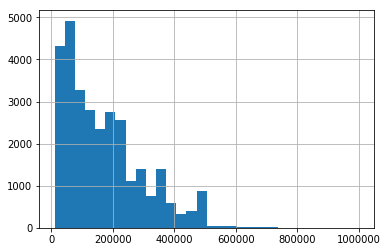

In [254]:
df['LIMIT_BAL'].hist(bins=30) #TODO

In [ ]:
# (8) построить среднее значение кредитного лимита для каждого вида образования 
# и для каждого пола
# график необходимо сделать очень широким (на весь экран)
df #TODO

In [ ]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

#TODO

In [ ]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn as sns
 
#TODO